<a href="https://colab.research.google.com/github/KUNALKEDARI20/Assignments/blob/main/Assignment_07_CRIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------------------------------------------------------CRIME DATA:CLUSTERING----------------------------------------------------------------------------




**#PROBLEM STATEMENT OF CRIME DATASET**     

**Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

**Data Description:**

**Murder -- Muder rates in different places of United States**     

**Assualt- Assualt rate in different places of United States**

**UrbanPop - urban population in different places of United States**

**Rape - Rape rate in different places of United States**



---



---



**⚫K-MEANS**

---



---







In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
crimes_df=pd.read_csv('/content/crime_data.csv')
crimes_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crimes_df.rename(columns={'Unnamed: 0':'Place'},inplace=True)



In [5]:
crimes_df.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Normalisation/Standardisation of numerical columns
scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crimes_df.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

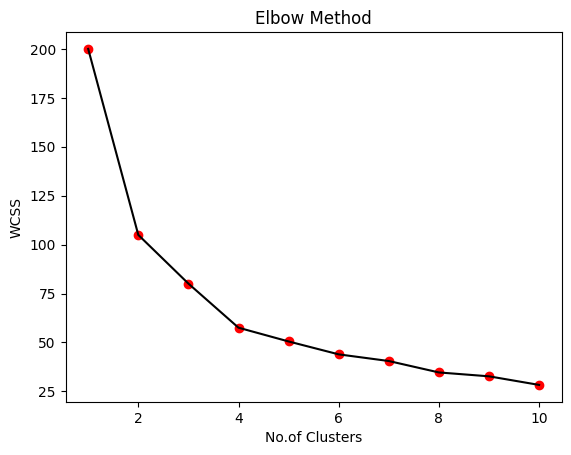

In [7]:
# Elbow curve
wcss=[] # within-cluster-sum-of-squares
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(scaled_crime_df)
  wcss.append(kmeans.inertia_)

#plot K-no.of clusters against the WCSS
plt.plot(range(1,11),wcss,color='black')
plt.scatter(range(1,11),wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

In [9]:
# Optimal no.of clusters(K)=4
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_crime_df)
#kmeans.labels_=predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
predict

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [11]:
# assign clusters to original dataset
crimes_df['Clusters']=predict
crimes_df

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [12]:
crimes_df.groupby('Clusters').agg(['mean']).reset_index()

<ipython-input-12-7c0d0ba23731>:1: FutureWarning: ['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crimes_df.groupby('Clusters').agg(['mean']).reset_index()


,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [13]:
crimes_df[crimes_df['Clusters']==0]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [14]:
crimes_df[crimes_df['Clusters']==1]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [15]:
crimes_df[crimes_df['Clusters']==2]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [16]:
crimes_df[crimes_df['Clusters']==3]

,Place,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
3,Arkansas,8.8,190,50,19.5,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3




---



---
⚫
**HIERACHICAL CLUSTERING**

---


---





In [17]:
# IMPORT LIBRARIES WHICH ARE ASSOCIATED WITH HIERACHICAL CLUSTERING
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch #to build dendrogram

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler # for normalisation/standardization


In [18]:
#load dataset
crime_hie=pd.read_csv('/content/crime_data.csv')
crime_hie.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6




---


# EDA

---



In [19]:
crime_hie.rename(columns={'Unnamed: 0':'Place'},inplace=True)
crime_hie.head(2)

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [20]:
crime_hie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB




---


# Normalisation

---





In [22]:
#user defined function
def norm_func(i): #function name is norm_func
 x=(i-i.min())/(i.max()-i.min())
 return x
df_norm_crime=norm_func(crime_hie.iloc[:,1:])#from 1st column because 0 index column is categorical(univ names)
df_norm_crime

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036




---

# Dendrogram

---



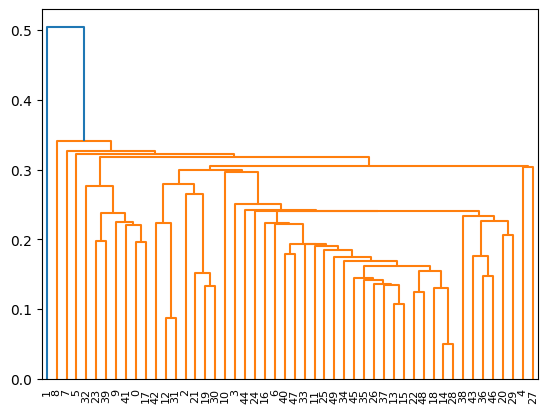

In [23]:
# Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm_crime,method='single'))

In [24]:
#create clusters,suppose we get input from client to go for 4 clusters

clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
clusters

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=4)

In [25]:
#clusters
clusters_hie=clusters.fit_predict(df_norm_crime)
clusters_hie


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [26]:
crime_hie['Hie_clusterID']=clusters_hie
crime_hie

,Place,Murder,Assault,UrbanPop,Rape,Hie_clusterID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [27]:
crime_hie[crime_hie['Hie_clusterID']==0].shape

(47, 6)

In [29]:
crime_hie[crime_hie['Hie_clusterID']==1]

,Place,Murder,Assault,UrbanPop,Rape,Hie_clusterID
7,Delaware,5.9,238,72,15.8,1


In [30]:
crime_hie[crime_hie['Hie_clusterID']==2]

,Place,Murder,Assault,UrbanPop,Rape,Hie_clusterID
8,Florida,15.4,335,80,31.9,2


In [31]:
crime_hie[crime_hie['Hie_clusterID']==3]

,Place,Murder,Assault,UrbanPop,Rape,Hie_clusterID
1,Alaska,10.0,263,48,44.5,3


In [32]:
crime_hie.groupby('Hie_clusterID').agg('mean')

<ipython-input-32-073461c29d78>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_hie.groupby('Hie_clusterID').agg('mean')


,Murder,Assault,UrbanPop,Rape
Hie_clusterID,,,,
0,7.619149,163.87234,65.468085,20.625532
1,5.900000,238.00000,72.000000,15.800000
2,15.400000,335.00000,80.000000,31.900000
3,10.000000,263.00000,48.000000,44.500000





---



---


**⚫DBSCAN**



---


---





In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [34]:
crime_dbscan=pd.read_csv('/content/crime_data.csv')
crime_dbscan.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
df=crime_dbscan.drop(columns=('Unnamed: 0'),axis=1) # there no need of places of crime in formation of clusters
df.head(3)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0


In [38]:
df.info() # there are 0 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [39]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<Axes: >

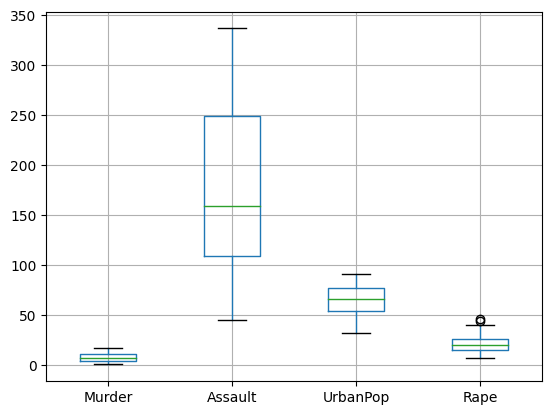

In [44]:
df.boxplot() # there are no outliers in murder,assault and urban pop column


<Axes: >

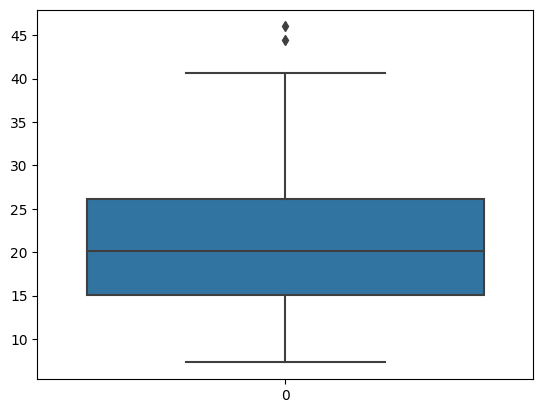

In [43]:
sns.boxplot(df['Rape']) #there are 2 is outlier in rape column

In [47]:
#feature scaling
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [62]:
#model building
db1=DBSCAN(eps=1,min_samples=4)
db1.fit_predict(scaled_df)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [78]:
# check which model is good by using Silhoutte Score
from sklearn.metrics import silhouette_score


In [79]:
silhouette_score(scaled_df,db1.fit_predict(scaled_df))

0.2051154919322

In [92]:
#storing predicted values in y
y=db1.fit_predict(scaled_df)

In [93]:
# Assign y to the dataset
crime_dbscan['Cluster']=y

In [ ]:
#A silhouette score close to +1 indicates that the data point is well
  #matched to its own cluster and poorly matched to neighboring clusters.
#A silhouette score around 0 indicates overlapping clusters.
#A silhouette score close to -1 indicates that the data point
  #is poorly matched to its own cluster and well-matched to neighboring cluster

In [94]:
crime_dbscan

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [96]:
#extract all outliers=-1
crime_dbscan[crime_dbscan['Cluster']==-1].count()

Unnamed: 0    18
Murder        18
Assault       18
UrbanPop      18
Rape          18
Cluster       18
dtype: int64

In [99]:
crime_dbscan[crime_dbscan['Cluster']==1].count()

Unnamed: 0    28
Murder        28
Assault       28
UrbanPop      28
Rape          28
Cluster       28
dtype: int64

In [100]:
crime_dbscan[crime_dbscan['Cluster']==0].count()

Unnamed: 0    4
Murder        4
Assault       4
UrbanPop      4
Rape          4
Cluster       4
dtype: int64

In [101]:


crime_dbscan.groupby('Cluster').agg('mean')

<ipython-input-101-69959577fe3b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_dbscan.groupby('Cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


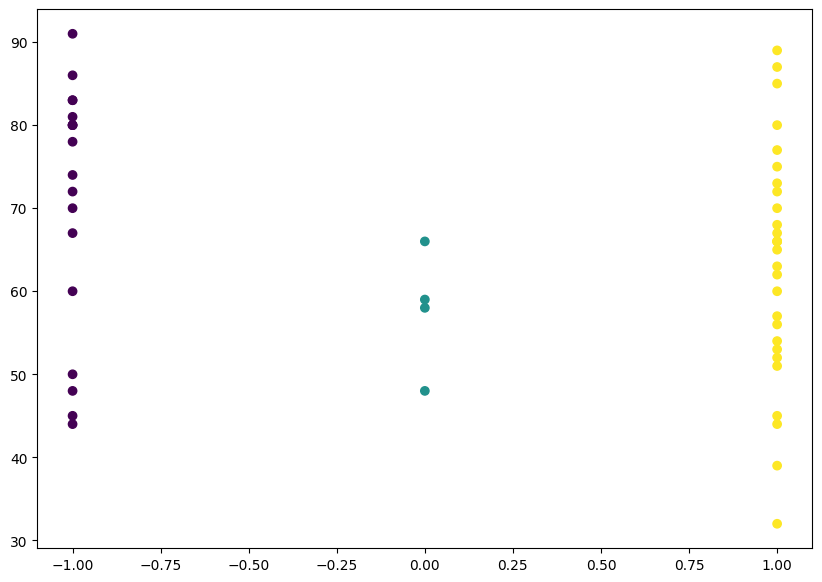

In [105]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(crime_dbscan['Cluster'],crime_dbscan['UrbanPop'], c=y)

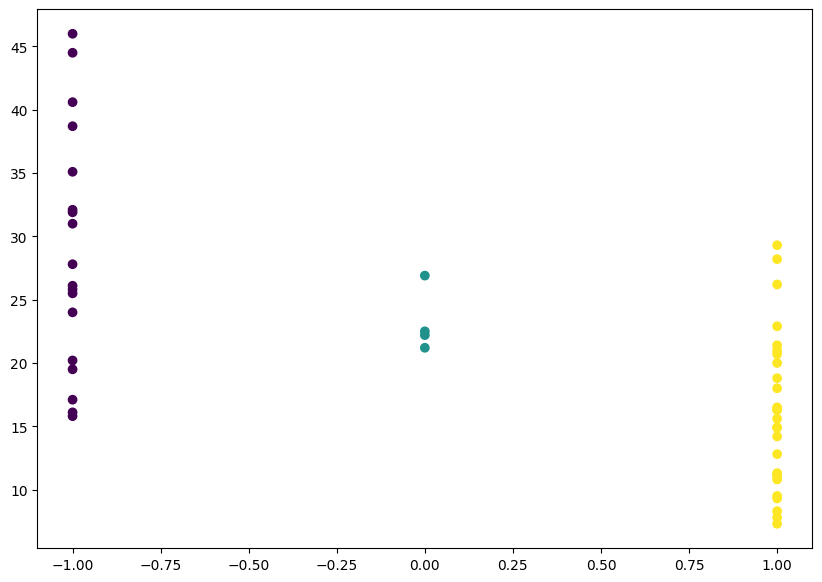

In [108]:
plt.figure(figsize=(10, 7))
plt.scatter(crime_dbscan['Cluster'],crime_dbscan['Rape'], c=y)